# Sistemas Inteligentes

## Exercício Computacional 3 - Redução de Dimensionalidade e Regressão

### Identificação do Aluno

#### Nome Completo

Gabriel Mesquita de Souza

#### RA

11057015

## Instruções

Pesquise por datasets voltados para regressões que estejam disponíveis na biblioteca Scikit, então escolha um para este exercício.

Utilize algum método de redução de dimensionalidade para realizar tal processo, então gere três modelos de regressão com diferentes métodos (um método diferente para cada modelo).

Calcule e exiba métricas que ajudem a conferir a qualidade dos modelos gerados.

Exiba gráficos que auxiliem na visualização dos dados e da curva de regressão.

Compare os modelos e comente os resultados obtidos.

Insira as referências utilizadas ao final.

## Desenvolvimento

In [1]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt

In [2]:
california = fetch_california_housing()

In [3]:
X = california.data
Y = california.target

In [4]:
X.shape

(20640, 8)

In [5]:
Y.shape

(20640,)

In [6]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [7]:
Y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [8]:
from sklearn.decomposition import FastICA

## 1 Modelo regressão - Bayesian Ridge, Fast ICA como método para redução de dimensionalidade

In [9]:
fast_ICA = FastICA(n_components=1)

In [10]:
X_fast_ICA = fast_ICA.fit_transform(X, Y)

In [11]:
X_fast_ICA

array([[-0.00678277],
       [ 0.00599619],
       [-0.0057135 ],
       ...,
       [-0.00257194],
       [-0.00420692],
       [-0.00023625]])

In [12]:
X_fast_ICA.shape

(20640, 1)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_fast_ICA, Y, test_size=0.20)

In [15]:
from sklearn.linear_model import BayesianRidge

In [16]:
BRC = BayesianRidge()

In [17]:
BRC.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [26]:
BRC_pred = BRC.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [74]:
mse_brc = mean_squared_error(X_test, BRC_pred)
mse_brc

1590368.1452513498

In [75]:
r2_brc = r2_score(X_test, BRC_pred)
r2_brc

-0.0002862958988434361

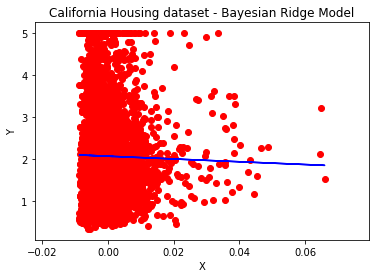

In [37]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, BRC.predict(X_test), color = 'blue')
plt.title('California Housing dataset - Bayesian Ridge Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## 2 Modelo regressão - Regressão Linear, PCA como método para redução de dimensionalidade

In [38]:
from sklearn.decomposition import PCA

In [39]:
PCA = PCA(n_components=1)

In [40]:
X_pca = PCA.fit_transform(X, Y)

In [42]:
X_pca.shape

(20640, 1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.20)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
LR = LinearRegression()

In [46]:
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
LR_pred = LR.predict(X_test)

In [72]:
mse_lr = mean_squared_error(X_test, LR_pred)
mse_lr

1590368.7119859096

In [73]:
r2_lr = r2_score(X_test, LR_pred)
r2_lr

-0.00028665235518676724

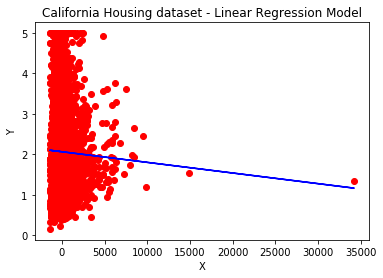

In [52]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, LR.predict(X_test), color = 'blue')
plt.title('California Housing dataset - Linear Regression Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## 3 Modelo regressão - LASSO, ISOMAP como método para redução de dimensionalidade

In [53]:
from sklearn.manifold import Isomap

In [55]:
isomap = Isomap(n_components=1)

In [56]:
X_isomap = isomap.fit_transform(X, Y)

In [57]:
X_isomap.shape

(20640, 1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.20)

In [59]:
from sklearn.linear_model import Lasso

In [60]:
LS = Lasso()

In [61]:
LS.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [62]:
LS_pred = LS.predict(X_test)

In [70]:
mse_ls = mean_squared_error(X_test, LS_pred)
mse_ls

1590434.9502049093

In [71]:
r2_ls = r2_score(X_test, LS_pred)
r2_ls

-0.0003283138930689766

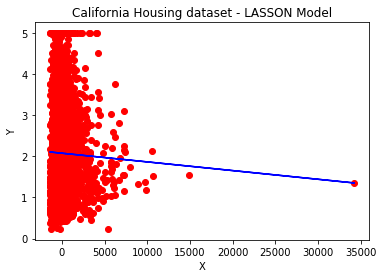

In [68]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, LS_pred, color = 'blue')
plt.title('California Housing dataset - LASSON Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Gráficos gerais

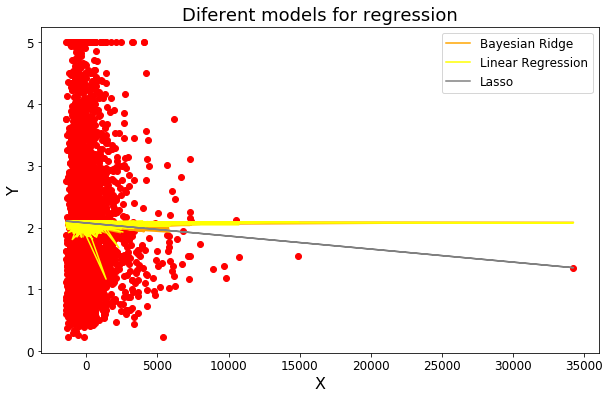

In [82]:
labels = ['Bayesian Ridge', 'Linear Regression', 'Lasso']

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, BRC_pred, color = 'orange')
plt.plot(X_test, LR_pred, color = 'yellow')
plt.plot(X_test, LS_pred, color = 'gray')
plt.title('Diferent models for regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(labels)
plt.show()